In [ ]:
# Importing all required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [ ]:
# Importing dataset

In [2]:
df=pd.read_csv('C:\\Users\\Rageshwar\\Downloads\\musk_csv.csv')

In [3]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [ ]:
# shape of dataset

In [4]:
df.shape

(6598, 170)

In [101]:
# checking for null values

In [5]:
df.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [ ]:
# statstical describtion of data

In [6]:
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [7]:
df.nunique()

ID                   6598
molecule_name         102
conformation_name    6598
f1                    202
f2                    260
                     ... 
f163                  292
f164                  172
f165                  352
f166                  385
class                   2
Length: 170, dtype: int64

In [ ]:
# deleting these colns bcz they may not have much impact on data frame

In [8]:
df.drop(['ID','molecule_name','conformation_name'],axis=1,inplace=True)

In [9]:
df.head(2)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1


In [ ]:
# value count for dependent variable

In [10]:
df['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [11]:
# Data is Imbalanced

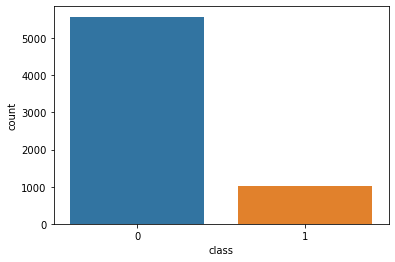

In [12]:
sns.countplot(x='class',data=df)
plt.show()

In [ ]:
# checking for frequency count of binary class

In [13]:
df['class'].value_counts()/len(df)*100

0    84.586238
1    15.413762
Name: class, dtype: float64

In [ ]:
# checking for corelation

In [14]:
df.corr()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
f1,1.000000,-0.142464,-0.164292,-0.291054,0.001037,0.090659,0.071879,-0.416191,0.090701,0.185305,...,0.010485,0.146428,-0.153096,0.002383,0.634797,-0.061317,0.142004,0.443060,-0.057199,-0.120883
f2,-0.142464,1.000000,0.611675,-0.244145,-0.134689,0.125947,-0.449526,0.187318,-0.484187,0.270608,...,0.172481,0.309392,0.339496,-0.030338,-0.118212,-0.028524,-0.069193,-0.133091,0.046361,-0.099896
f3,-0.164292,0.611675,1.000000,-0.378516,-0.080964,0.210432,-0.754798,0.426254,-0.760313,0.429700,...,0.261200,0.502924,0.259424,-0.020607,-0.206860,-0.131828,-0.111005,-0.086150,0.020434,-0.089760
f4,-0.291054,-0.244145,-0.378516,1.000000,-0.044896,-0.222191,0.453786,0.185135,0.420407,-0.559255,...,-0.308906,-0.607435,-0.279430,-0.118705,-0.241346,0.182826,-0.189530,-0.364233,0.072985,-0.098592
f5,0.001037,-0.134689,-0.080964,-0.044896,1.000000,0.024860,0.045389,-0.162539,0.064376,0.005144,...,0.004808,0.019286,0.225484,0.195782,0.103419,0.027131,-0.046188,-0.090038,-0.081910,-0.045040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f163,-0.061317,-0.028524,-0.131828,0.182826,0.027131,0.046881,0.131520,-0.090044,0.127985,-0.115943,...,-0.067344,-0.109691,-0.345939,-0.265327,-0.430409,1.000000,0.463805,-0.259628,-0.321964,-0.217481
f164,0.142004,-0.069193,-0.111005,-0.189530,-0.046188,0.024317,0.049882,-0.266026,0.058630,0.131188,...,0.010607,0.081277,-0.237208,-0.249093,-0.084307,0.463805,1.000000,0.484594,-0.137858,-0.077266
f165,0.443060,-0.133091,-0.086150,-0.364233,-0.090038,0.002557,0.000166,-0.298356,0.016455,0.238632,...,0.056730,0.177570,-0.105115,-0.193039,0.352140,-0.259628,0.484594,1.000000,0.161670,0.049457
f166,-0.057199,0.046361,0.020434,0.072985,-0.081910,-0.050493,0.004980,0.138932,-0.002590,-0.075235,...,-0.036913,-0.040783,0.110229,-0.333230,0.071019,-0.321964,-0.137858,0.161670,1.000000,0.069114


In [ ]:
# checking for distribution of data

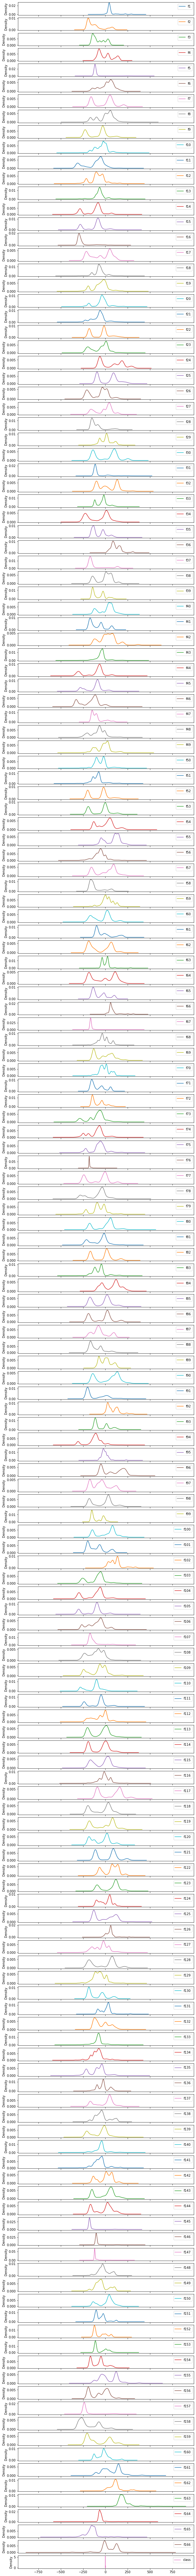

In [15]:
df.plot(kind='kde', subplots=True, figsize=(10,150), sharex=True )
plt.show()

In [ ]:
# plotting box plot for checking the outliers

<function matplotlib.pyplot.xticks>

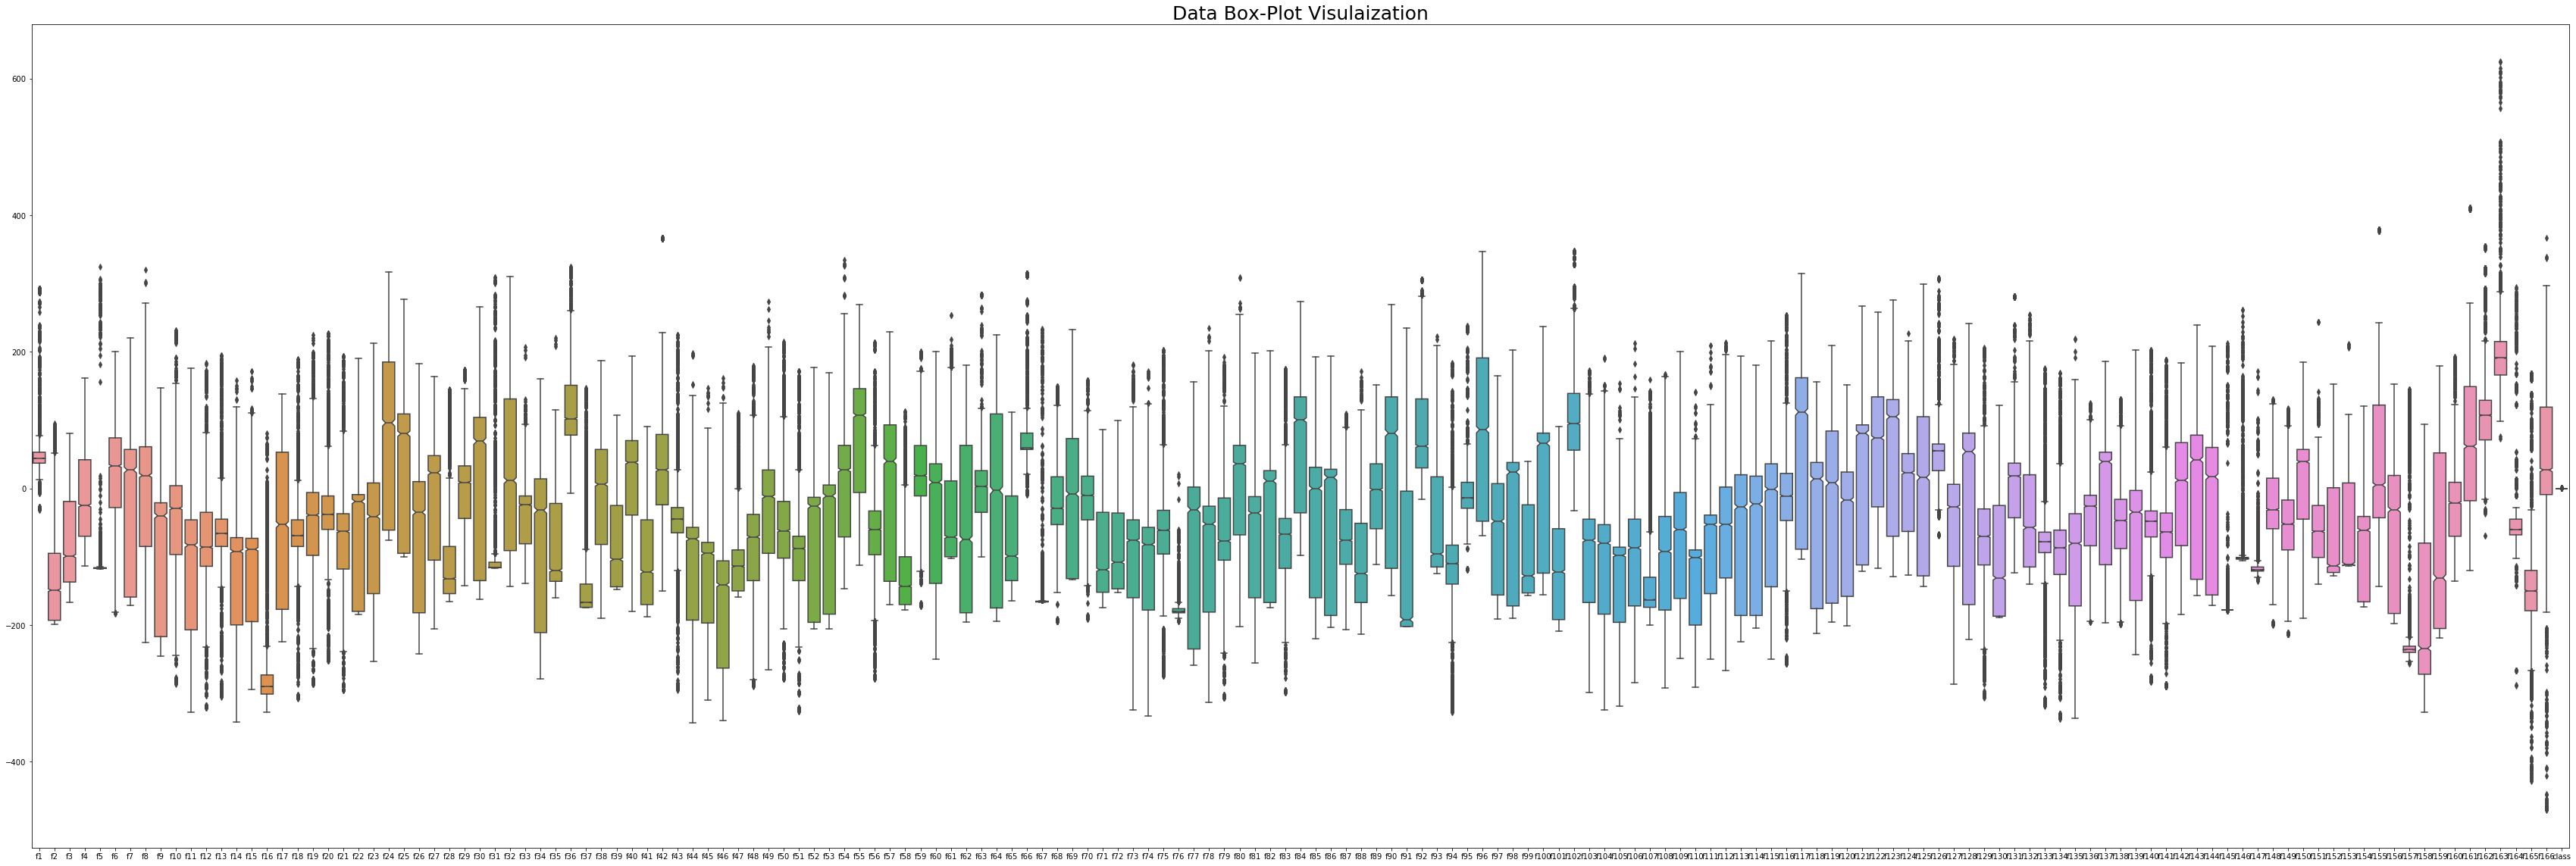

In [16]:
plt.figure(figsize=(60,20))
sns.boxplot(data=df,notch=True)
plt.title('Data Box-Plot Visulaization',fontsize=25)
plt.xticks

In [17]:
# as we can see here alot of feature so we will remove some of feature which are most corelated

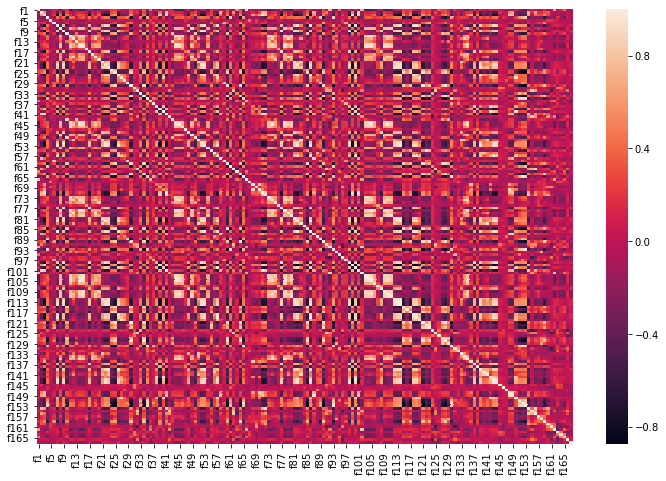

In [18]:
cormat=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cormat)

In [19]:

# Create correlation matrix
cormat = df.corr().abs()

# Select upper triangle of correlation matrix
upper = cormat.where(np.triu(np.ones(cormat.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [ ]:
# droping features which have corelation more than 95%

In [20]:
df = df.drop(columns = to_drop)

In [21]:
df.shape

(6598, 135)

In [ ]:
# seprating independent and dependent variable

In [22]:
x=df.drop('class',axis=1)
y=df['class']

In [23]:
print('independent features',x.shape)
print('dependent faeture',y.shape)

independent features (6598, 134)
dependent faeture (6598,)


In [ ]:
# train test split

In [24]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [25]:
print('train data size',train_x.shape)
print('test data size',test_x.shape)

train data size (5278, 134)
test data size (1320, 134)


In [ ]:
# standard scaling of data to have values in scale between -2 to 2
# bcz some features values varing by magnitude so we scale them

In [26]:
ss=StandardScaler()
train_x=ss.fit_transform(train_x)
test_x=ss.transform(test_x)

In [ ]:
# applying linear disriminant analysis 
# Linear discriminant analysis (LDA) is used here to reduce the number of features to a more manageable number
# before the process of classification. Each of the new dimensions generated is a linear combination  values


In [27]:
lda=LinearDiscriminantAnalysis(n_components=2)
train_x=lda.fit_transform(train_x,train_y)
test_x=lda.transform(test_x)

In [ ]:
# applying classification techniques

In [28]:
models = []
models.append(('logistic_regression', LogisticRegression()))
models.append(('knn', KNeighborsClassifier()))
models.append(('Decision_tree', DecisionTreeClassifier()))
models.append(('random_forest', RandomForestClassifier()))
models.append(('svm', SVC()))

In [ ]:
# applying stratified k fold bcz as we see our data was imbaalaced startified help to shuffle the data equaly for both the classes

In [29]:
results = []
names = []
for name, model in models:
    skflod = StratifiedKFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(estimator=model, X=train_x, y=train_y, cv=skflod, scoring='accuracy',)
    results.append(cv_result)
    names.append(name)
    print(f' model {name} :---  mean : {cv_result.mean()}  std : {cv_result.std()}')

 model logistic_regression :---  mean : 0.9401331867057674  std : 0.008786429646999857
 model knn :---  mean : 0.9367233770340981  std : 0.00814754309848957
 model Decision_tree :---  mean : 0.907168219193836  std : 0.011384248338282275
 model random_forest :---  mean : 0.907168219193836  std : 0.011384248338282275
 model svm :---  mean : 0.9414593036628143  std : 0.007281000004436186


In [30]:
# here we can see that logistic regression got mean accuracy of 94.01% and and std devaiaton of .8 and Support vector machine
# has mean accuracy of 94.03% and std deviation of .9 

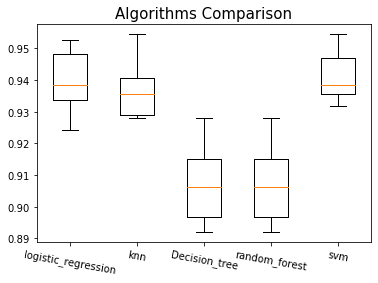

In [31]:
plt.boxplot(results, )
plt.xticks(np.arange(len(names))+1, names, rotation=-10)
plt.title('Algorithms Comparison', fontsize = 15)
plt.show()

In [32]:
# hyperparameter tunning for svc

In [33]:
sv=SVC()

In [34]:
sv.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

In [35]:
parameter= {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
            'random_state' : [0,4, 10, 50,100],
              'kernel': ['rbf']}  

In [36]:
skflod = StratifiedKFold(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=sv, param_grid=parameter, scoring='accuracy', cv=skflod,n_jobs=-1)

In [37]:
grid_result = grid.fit(train_x, train_y)

In [38]:
print('Best Parameter : ',grid_result.best_params_, 'with score : ', grid_result.best_score_)

Best Parameter :  {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 0} with score :  0.9425956672991779


In [39]:
# hyperparameter tunning for logistic regression

In [40]:
parameter={'dual':[True,False],
           'random_state' : [4, 10, 50,100],
    'max_iter':[100,110,120,130,140]}

In [41]:
lg=LogisticRegression(penalty='l2')

In [42]:
skflod = StratifiedKFold(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=lg, param_grid=parameter, scoring='accuracy', cv=skflod,n_jobs=-1)

In [43]:
grid_result = grid.fit(train_x, train_y)

In [44]:
print('Best Parameter : ',grid_result.best_params_, 'with score : ', grid_result.best_score_)

Best Parameter :  {'dual': False, 'max_iter': 100, 'random_state': 4} with score :  0.9401331867057674


In [45]:
# Final model

In [89]:
model=SVC(C=0.1,gamma=0.1, kernel= 'rbf',random_state=0,probability=True)

In [90]:
model.fit(train_x,train_y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [91]:
pred_y=model.predict(test_x)

In [92]:
y_pre_prob=model.predict_proba(test_x)
y_pre_prob

array([[0.95551507, 0.04448493],
       [0.96738546, 0.03261454],
       [0.96743694, 0.03256306],
       ...,
       [0.96207186, 0.03792814],
       [0.96497186, 0.03502814],
       [0.96569316, 0.03430684]])

In [93]:
print('Model Accuracy: ',accuracy_score(test_y,pred_y))

Model Accuracy:  0.9378787878787879


In [94]:
confusion_matrix(test_y,pred_y)

array([[1094,   23],
       [  59,  144]], dtype=int64)

In [95]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1117
           1       0.86      0.71      0.78       203

    accuracy                           0.94      1320
   macro avg       0.91      0.84      0.87      1320
weighted avg       0.94      0.94      0.94      1320



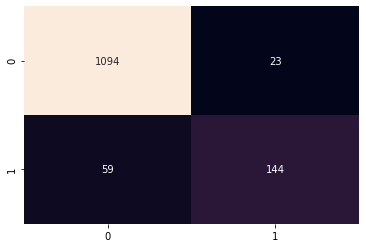

In [96]:
sns.heatmap(confusion_matrix(test_y, pred_y), annot=True, cbar=False,  fmt='0.0f' )

In [97]:
## This AUC-ROC curve shows that 94% percent chance that model can distinguish 
## between positive class and negative class.

In [98]:
import sklearn.metrics as metrics
pred=y_pre_prob[:,1]
fpr,tpr,threshold=metrics.roc_curve(test_y,pred)
roc_auc=metrics.auc(fpr,tpr)

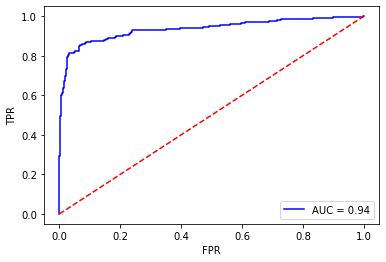

In [99]:
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()